# One-way Anova

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('liquor_dataset.csv', index_col = 0)

In [12]:
df.head()

,week,store_number,general_alcohol_category,city,county,initial claims,volume_sold_(liters)
0,1,2500,amaretto,AMES,STORY,167.0,6.75
1,1,2500,amaretto,AMES,STORY,248.0,3.75
2,1,2500,amaretto,AMES,STORY,306.0,2.25
3,1,2500,brandy,AMES,STORY,159.0,33.73
4,1,2500,brandy,AMES,STORY,167.0,33.80


,mean,std
general_alcohol_category,,
amaretto,12.015031,11.984689
bourbon,4.070879,5.905013
brandy,27.163489,29.085454
cocktail,58.489247,105.421960
creme,6.170168,7.648201
gin,39.497795,50.732965
other,130.551694,210.387576
rum,155.303484,248.262948
scotch,9.633912,16.332593


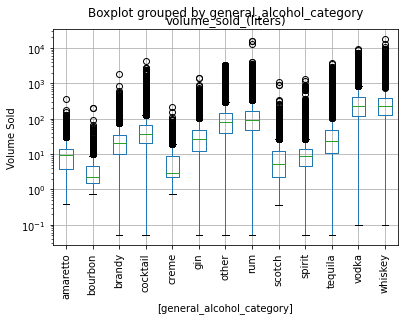

In [16]:
df.boxplot(column=['volume_sold_(liters)'],by = ['general_alcohol_category'], rot=90).set_yscale('log')
plt.ylabel("Volume Sold")
pd.DataFrame(df.groupby( ['general_alcohol_category'])['volume_sold_(liters)'].describe().loc[:,['mean','std']])

AttributeError: 'NoneType' object has no attribute 'plot'

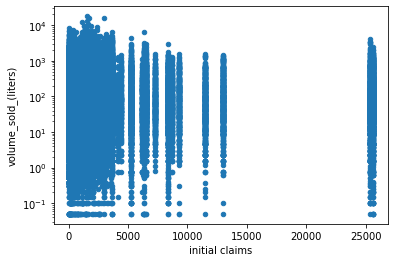

In [18]:
#What is happening here?
x = df['initial claims']
ax = df.plot(x='initial claims', y='volume_sold_(liters)', kind='scatter').set_yscale('log')
ax.plot(x)

In [25]:
df.head()

,week,store_number,general_alcohol_category,city,county,initial claims,volume_sold_(liters)
0,1,2500,amaretto,AMES,STORY,167.0,6.75
1,1,2500,amaretto,AMES,STORY,248.0,3.75
2,1,2500,amaretto,AMES,STORY,306.0,2.25
3,1,2500,brandy,AMES,STORY,159.0,33.73
4,1,2500,brandy,AMES,STORY,167.0,33.80


In [29]:
df['volume'] = df['volume_sold_(liters)']
df['alcohol'] = df['general_alcohol_category']

In [30]:
df.head()

,week,store_number,general_alcohol_category,city,county,initial claims,volume_sold_(liters),volume,alcohol
0,1,2500,amaretto,AMES,STORY,167.0,6.75,6.75,amaretto
1,1,2500,amaretto,AMES,STORY,248.0,3.75,3.75,amaretto
2,1,2500,amaretto,AMES,STORY,306.0,2.25,2.25,amaretto
3,1,2500,brandy,AMES,STORY,159.0,33.73,33.73,brandy
4,1,2500,brandy,AMES,STORY,167.0,33.80,33.80,brandy


In [40]:
df = df.drop(['volume_sold_(liters)', 'general_alcohol_category'],axis = 1)

In [57]:
#in preparation for the anova, grouping by alcohol group
dff_alcohols = df.groupby('alcohol')['volume'].mean()

In [58]:
df_alcohol = dff_alcohols.to_frame()

In [59]:
df_alcohol = df_alcohol.reset_index()

In [60]:
#mean volume sold per week per alcohol category
df_alcohol

,alcohol,volume
0,amaretto,12.015031
1,bourbon,4.070879
2,brandy,27.163489
3,cocktail,58.489247
4,creme,6.170168
5,gin,39.497795
6,other,130.551694
7,rum,155.303484
8,scotch,9.633912
9,spirit,16.129562


In [31]:
import statsmodels.api as sm
#from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.formula.api import ols

In [61]:
model = ols('volume ~ alcohol', data =df_alcohol).fit()

In [63]:
aov_table = sm.stats.anova_lm(model)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/anova.py:140: RuntimeWarning: divide by zero encountered in double_scalars
  (model.ssr / model.df_resid))
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [64]:
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
alcohol,12.0,1.788540e+05,1.490450e+04,0.0,NaN
Residual,0.0,2.069908e-25,inf,NaN,NaN


In [65]:
model.summary()

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 volume   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Tue, 16 Feb 2021   Prob (F-statistic):                nan
Time:                        19:26:01   Log-Likelihood:                 367.67
No. Observations:                  13   AIC:                            -709.3
Df Residuals:                       0   BIC:                            -702.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              12.0150        inf          0        nan         nan         nan
alcohol[T.bourbon]     -7.9442        inf         -0        nan         nan         nan
alcohol[T.brandy]      15.1485        inf          0        nan         nan         nan
alcohol[T.cocktail]    46.4742        inf          0        nan         nan         nan
alcohol[T.creme]       -5.8449        inf         -0        nan         nan         nan
alcohol[T.gin]         27.4828        inf          0        nan         nan         nan
alcohol[T.other]      118.5367        inf          0        nan         nan         nan
alcohol[T.rum]        143.2885        inf          0        nan         nan         nan
alcohol[T.scotch]      -2.3811        inf         -0        nan         nan         nan
alcohol[T.spirit]       4.1145        inf          0        nan         nan         nan
alcohol[T.tequila]     44.8923        inf          0        nan         nan         nan
alcohol[T.vodka]      348.4888        inf          0        nan         nan         nan
alcohol[T.whiskey]    320.6679        inf          0        nan         nan         nan
==============================================================================
Omnibus:                       16.781   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.086
Skew:                           1.607   Prob(JB):                     0.000873
Kurtosis:                       6.959   Cond. No.                         13.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
#See if there is a correlation between initial claims and volume sold 
df.head()

,week,store_number,city,county,initial claims,volume,alcohol
0,1,2500,AMES,STORY,167.0,6.75,amaretto
1,1,2500,AMES,STORY,248.0,3.75,amaretto
2,1,2500,AMES,STORY,306.0,2.25,amaretto
3,1,2500,AMES,STORY,159.0,33.73,brandy
4,1,2500,AMES,STORY,167.0,33.80,brandy


In [68]:
from numpy import cov
covariance = cov(df['initial claims'], df['volume'])

In [69]:
#This is the covariance matrix
covariance

array([[3794398.37333455,   26040.6895233 ],
       [  26040.6895233 ,   74422.19959132]])

In [70]:
from scipy.stats import pearsonr

In [73]:
corr, _ = pearsonr(df['initial claims'], df['volume'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.049


In [ ]:
It does not appear that initial unemployment claims are correlated with volume of sales per store per week